In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import folium
from folium import plugins
import os
import shutil


#!pip install jupyternotify
import jupyternotify
ip = get_ipython()
ip.register_magics(jupyternotify.JupyterNotifyMagics)
## Run %%notify to create notification for completed cell
%notify

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [71]:
calendar = pd.read_csv('Data/seattle_airbnb/calendar.csv', parse_dates=[1], index_col=[1])
listings = pd.read_csv('Data/seattle_airbnb/listings.csv')
reviews = pd.read_csv('Data/seattle_airbnb/reviews.csv', parse_dates=[2])

In [72]:
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [73]:
calendar.head()

,listing_id,available,price
date,,,
2016-01-04,241032,t,$85.00
2016-01-05,241032,t,$85.00
2016-01-06,241032,f,NaN
2016-01-07,241032,f,NaN
2016-01-08,241032,f,NaN


In [76]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1393570 entries, 2016-01-04 to 2017-01-02
Data columns (total 3 columns):
listing_id    1393570 non-null int64
available     1393570 non-null bool
price         934542 non-null object
dtypes: bool(1), int64(1), object(1)
memory usage: 33.2+ MB


In [83]:
#calendar['available'].replace({'t': True, 'f': False}, inplace=True)
calendar['price'] = calendar['price'].map(lambda s: s.strip('$'))

KeyboardInterrupt: 

In [ ]:
%notify

In [80]:
calendar.price.dropna(inplace=True)

In [53]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1393570 entries, 2016-01-04 to 2017-01-02
Data columns (total 3 columns):
listing_id    1393570 non-null int64
available     1393570 non-null bool
price         934542 non-null object
dtypes: bool(1), int64(1), object(1)
memory usage: 33.2+ MB


In [6]:
calendar['available'].replace({'t': True, 'f': False}, inplace=True)

In [7]:
calendar['price'] = calendar['price'].fillna('$0.00')

In [8]:
calendar['price'] = calendar['price'].apply(lambda x: x.replace('$', '').replace(',', '')).astype('float')

In [9]:
calendar.head()

,listing_id,available,price
date,,,
2016-01-04,241032,True,85.0
2016-01-05,241032,True,85.0
2016-01-06,241032,False,0.0
2016-01-07,241032,False,0.0
2016-01-08,241032,False,0.0


In [10]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1393570 entries, 2016-01-04 to 2017-01-02
Data columns (total 3 columns):
listing_id    1393570 non-null int64
available     1393570 non-null bool
price         1393570 non-null float64
dtypes: bool(1), float64(1), int64(1)
memory usage: 33.2 MB


In [11]:
listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [12]:
worthless_info = listings[['listing_url', 'scrape_id', 'last_scraped', 'thumbnail_url', 'medium_url', 
                           'picture_url', 'xl_picture_url', 'neighbourhood_cleansed',
                           'neighbourhood_group_cleansed', 'country_code', 'country', 'is_location_exact',
                           'calendar_last_scraped', 'license', 'jurisdiction_names', 'square_feet',
                           'notes', 'neighborhood_overview']]
host_info = listings[['host_id', 'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
                      'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
                      'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_listings_count',
                      'host_verifications', 'host_has_profile_pic', 'host_identity_verified']]

In [13]:
drop = pd.concat([worthless_info, host_info], axis=1)
drop = drop.columns
drop

Index(['listing_url', 'scrape_id', 'last_scraped', 'thumbnail_url',
       'medium_url', 'picture_url', 'xl_picture_url', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'country_code', 'country',
       'is_location_exact', 'calendar_last_scraped', 'license',
       'jurisdiction_names', 'square_feet', 'notes', 'neighborhood_overview',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified'],
      dtype='object')

In [14]:
listings = listings.drop(drop, axis=1)
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 57 columns):
id                                  3818 non-null int64
name                                3818 non-null object
summary                             3641 non-null object
space                               3249 non-null object
description                         3818 non-null object
experiences_offered                 3818 non-null object
transit                             2884 non-null object
host_total_listings_count           3816 non-null float64
street                              3818 non-null object
neighbourhood                       3402 non-null object
city                                3818 non-null object
state                               3818 non-null object
zipcode                             3811 non-null object
market                              3818 non-null object
smart_location                      3818 non-null object
latitude                            38

In [15]:
listings.isna().sum()

id                                     0
name                                   0
summary                              177
space                                569
description                            0
experiences_offered                    0
transit                              934
host_total_listings_count              2
street                                 0
neighbourhood                        416
city                                   0
state                                  0
zipcode                                7
market                                 0
smart_location                         0
latitude                               0
longitude                              0
property_type                          1
room_type                              0
accommodates                           0
bathrooms                             16
bedrooms                               6
beds                                   1
bed_type                               0
amenities       

In [16]:
reviews.head()

,listing_id,id,reviewer_id,reviewer_name,comments
date,,,,,
2015-07-19,7202016,38917982,28943674,Bianca,Cute and cozy place. Perfect location to every...
2015-07-20,7202016,39087409,32440555,Frank,Kelly has a great room in a very central locat...
2015-07-26,7202016,39820030,37722850,Ian,"Very spacious apartment, and in a great neighb..."
2015-08-02,7202016,40813543,33671805,George,Close to Seattle Center and all it has to offe...
2015-08-10,7202016,41986501,34959538,Ming,Kelly was a great host and very accommodating ...


In [17]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 84849 entries, 2015-07-19 to 2015-12-13
Data columns (total 5 columns):
listing_id       84849 non-null int64
id               84849 non-null int64
reviewer_id      84849 non-null int64
reviewer_name    84849 non-null object
comments         84831 non-null object
dtypes: int64(3), object(2)
memory usage: 3.9+ MB


In [18]:
marks = listings
marks = marks[['latitude', 'longitude', 'id', 'price', 'property_type', 'bedrooms', 'bathrooms']]
marks['price'] = marks['price'].apply(lambda s: s.replace('$', '').replace(',', '')).astype('float')
marks['property_type'] = marks['property_type'].replace({'Townhouse': 'Other', 
                                                         'Bungalow': 'Other',
                                                         'Condominium': 'Other', 
                                                         'Camper/RV': 'Other',
                                                         'Cabin': 'Other'})
marks.head()

/Users/steeznation/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/steeznation/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,latitude,longitude,id,price,property_type,bedrooms,bathrooms
0,47.636289,-122.371025,241032,85.0,Apartment,1.0,1.0
1,47.639123,-122.365666,953595,150.0,Apartment,1.0,1.0
2,47.629724,-122.369483,3308979,975.0,House,5.0,4.5
3,47.638473,-122.369279,7421966,100.0,Apartment,0.0,1.0
4,47.632918,-122.372471,278830,450.0,House,3.0,2.0


In [19]:
locations = marks[['latitude', 'longitude']]
locationlist = locations.values.tolist()
print(len(locationlist))
locationlist[:5]

3818


[[47.636289038357184, -122.37102519997765],
 [47.63912312136253, -122.36566646439582],
 [47.629724131577355, -122.3694831756176],
 [47.63847320176642, -122.36927912263019],
 [47.63291840276724, -122.37247063402224]]

In [20]:
marks.loc[1]

latitude           47.6391
longitude         -122.366
id                  953595
price                  150
property_type    Apartment
bedrooms                 1
bathrooms                1
Name: 1, dtype: object

In [21]:
#if(not os.path.exists('Maps/airbnb_cluster.html')):
clusters=folium.Map(location=[listings.latitude.mean(),listings.longitude.mean()],
                  zoom_start=11,tiles='OpenStreetMap')
plugins.MarkerCluster(locationlist).add_to(clusters)
plugins.ScrollZoomToggler().add_to(clusters)
clusters.save(os.path.join('Maps/', 'airbnb_cluster.html'))
clusters

In [22]:
#if(not os.path.exists('Maps/airbnb_ind_1.html')):
airbnb_map=folium.Map(location=[listings.latitude.mean(),listings.longitude.mean()],
                      zoom_start=11,tiles='OpenStreetMap')
for point in np.random.randint(0, len(locationlist), 100):
    folium.Marker(locationlist[point]).add_to(airbnb_map)
plugins.ScrollZoomToggler().add_to(airbnb_map)
airbnb_map.save(os.path.join('Maps/', 'airbnb_ind_1.html'))
airbnb_map

In [23]:
listings.head()

,id,name,summary,space,description,experiences_offered,transit,host_total_listings_count,street,neighbourhood,...,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,3.0,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,...,10.0,9.0,10.0,f,f,moderate,f,f,2,4.07
1,953595,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Convenient bus stops are just down the block, ...",6.0,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,...,10.0,10.0,10.0,f,f,strict,t,t,6,1.48
2,3308979,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,A bus stop is just 2 blocks away. Easy bus a...,2.0,"West Lee Street, Seattle, WA 98119, United States",Queen Anne,...,10.0,10.0,10.0,f,f,strict,f,f,2,1.15
3,7421966,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,1.0,"8th Avenue West, Seattle, WA 98119, United States",Queen Anne,...,NaN,NaN,NaN,f,f,flexible,f,f,1,NaN
4,278830,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,The nearest public transit bus (D Line) is 2 b...,2.0,"14th Ave W, Seattle, WA 98119, United States",Queen Anne,...,10.0,9.0,9.0,f,f,strict,f,f,1,0.89


In [24]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 57 columns):
id                                  3818 non-null int64
name                                3818 non-null object
summary                             3641 non-null object
space                               3249 non-null object
description                         3818 non-null object
experiences_offered                 3818 non-null object
transit                             2884 non-null object
host_total_listings_count           3816 non-null float64
street                              3818 non-null object
neighbourhood                       3402 non-null object
city                                3818 non-null object
state                               3818 non-null object
zipcode                             3811 non-null object
market                              3818 non-null object
smart_location                      3818 non-null object
latitude                            38

In [25]:
reviews_list = listings[['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_cleanliness',
          'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value']]

In [26]:
reviews_list.head()

,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,95.0,10.0,10.0,10.0,10.0,10.0,9.0,10.0
1,96.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
2,97.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,92.0,9.0,9.0,9.0,10.0,10.0,9.0,9.0


/Users/steeznation/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/steeznation/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


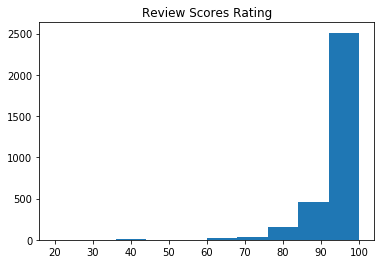

In [27]:
plt.hist(reviews_list.review_scores_rating.values)
plt.title('Review Scores Rating');

In [28]:
calendar.head()

,listing_id,available,price
date,,,
2016-01-04,241032,True,85.0
2016-01-05,241032,True,85.0
2016-01-06,241032,False,0.0
2016-01-07,241032,False,0.0
2016-01-08,241032,False,0.0


In [29]:
listings.head()

,id,name,summary,space,description,experiences_offered,transit,host_total_listings_count,street,neighbourhood,...,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,3.0,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,...,10.0,9.0,10.0,f,f,moderate,f,f,2,4.07
1,953595,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Convenient bus stops are just down the block, ...",6.0,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,...,10.0,10.0,10.0,f,f,strict,t,t,6,1.48
2,3308979,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,A bus stop is just 2 blocks away. Easy bus a...,2.0,"West Lee Street, Seattle, WA 98119, United States",Queen Anne,...,10.0,10.0,10.0,f,f,strict,f,f,2,1.15
3,7421966,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,1.0,"8th Avenue West, Seattle, WA 98119, United States",Queen Anne,...,NaN,NaN,NaN,f,f,flexible,f,f,1,NaN
4,278830,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,The nearest public transit bus (D Line) is 2 b...,2.0,"14th Ave W, Seattle, WA 98119, United States",Queen Anne,...,10.0,9.0,9.0,f,f,strict,f,f,1,0.89


In [30]:
reviews.head()

,listing_id,id,reviewer_id,reviewer_name,comments
date,,,,,
2015-07-19,7202016,38917982,28943674,Bianca,Cute and cozy place. Perfect location to every...
2015-07-20,7202016,39087409,32440555,Frank,Kelly has a great room in a very central locat...
2015-07-26,7202016,39820030,37722850,Ian,"Very spacious apartment, and in a great neighb..."
2015-08-02,7202016,40813543,33671805,George,Close to Seattle Center and all it has to offe...
2015-08-10,7202016,41986501,34959538,Ming,Kelly was a great host and very accommodating ...


# Analyze Text Data from Listings and Reviews

In [31]:
import nltk


In [32]:
listings.head()

,id,name,summary,space,description,experiences_offered,transit,host_total_listings_count,street,neighbourhood,...,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,3.0,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,...,10.0,9.0,10.0,f,f,moderate,f,f,2,4.07
1,953595,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Convenient bus stops are just down the block, ...",6.0,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,...,10.0,10.0,10.0,f,f,strict,t,t,6,1.48
2,3308979,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,A bus stop is just 2 blocks away. Easy bus a...,2.0,"West Lee Street, Seattle, WA 98119, United States",Queen Anne,...,10.0,10.0,10.0,f,f,strict,f,f,2,1.15
3,7421966,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,1.0,"8th Avenue West, Seattle, WA 98119, United States",Queen Anne,...,NaN,NaN,NaN,f,f,flexible,f,f,1,NaN
4,278830,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,The nearest public transit bus (D Line) is 2 b...,2.0,"14th Ave W, Seattle, WA 98119, United States",Queen Anne,...,10.0,9.0,9.0,f,f,strict,f,f,1,0.89


In [33]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 57 columns):
id                                  3818 non-null int64
name                                3818 non-null object
summary                             3641 non-null object
space                               3249 non-null object
description                         3818 non-null object
experiences_offered                 3818 non-null object
transit                             2884 non-null object
host_total_listings_count           3816 non-null float64
street                              3818 non-null object
neighbourhood                       3402 non-null object
city                                3818 non-null object
state                               3818 non-null object
zipcode                             3811 non-null object
market                              3818 non-null object
smart_location                      3818 non-null object
latitude                            38

In [34]:
listings_text = listings[['name', 'summary', 'space', 'description', 'transit', 'amenities']]

In [35]:
reviews.head()

,listing_id,id,reviewer_id,reviewer_name,comments
date,,,,,
2015-07-19,7202016,38917982,28943674,Bianca,Cute and cozy place. Perfect location to every...
2015-07-20,7202016,39087409,32440555,Frank,Kelly has a great room in a very central locat...
2015-07-26,7202016,39820030,37722850,Ian,"Very spacious apartment, and in a great neighb..."
2015-08-02,7202016,40813543,33671805,George,Close to Seattle Center and all it has to offe...
2015-08-10,7202016,41986501,34959538,Ming,Kelly was a great host and very accommodating ...


In [36]:
reviews.rename(index=str, columns={"id": "review_id"}, inplace=True)

In [37]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
Index: 84849 entries, 2015-07-19 00:00:00 to 2015-12-13 00:00:00
Data columns (total 5 columns):
listing_id       84849 non-null int64
review_id        84849 non-null int64
reviewer_id      84849 non-null int64
reviewer_name    84849 non-null object
comments         84831 non-null object
dtypes: int64(3), object(2)
memory usage: 3.9+ MB


In [38]:
reviews.listing_id.nunique()

3191

In [39]:
reviews.dropna(inplace=True)

In [40]:
ids = list(reviews.listing_id.unique())

In [41]:
review_dict = {}
for i in ids:
    df = reviews.loc[reviews['listing_id'] == i]
    review_dict[i] = {}
    review_dict[i]['reviewer_id'] = (df['reviewer_id'])
    review_dict[i]['reviewer'] = (df['reviewer_name'])
    review_dict[i]['comments'] = (df['comments'])

In [42]:
#reviews_text = reviews['comments']